In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
data_path = "/content/drive/My Drive/Colab Notebooks/Ml_projects/1.AQI/Data/AQI"
project_path =  "/content/drive/My Drive/Colab Notebooks/Ml_projects/1.AQI/"

In [6]:
files = os.listdir(data_path)

In [7]:
for f in files:
  print(f)

aqi2013.csv
aqi2014.csv
aqi2015.csv
aqi2016.csv
aqi2017.csv
aqi2018.csv


In [20]:
def avg_year():
  avg_year_data = []
  for f in files:
    avg_data = []
    year_wise_data = os.path.join(data_path,f)
    for row in pd.read_csv(year_wise_data,chunksize=24):
      data = []
      add_var = 0
      df = pd.DataFrame(data = row)
      for index,row in df.iterrows():
        data.append(row['PM2.5'])
      for i in data:
        if type(i) is float or type(i) is int:
          add_var +=add_var
        elif type(i) is str:
          if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
            temp = float(i)
            add_var +=temp
      avg_data.append(add_var/24)
    avg_year_data.append(avg_data)
  return avg_year_data

In [21]:
data_year_wise = avg_year()

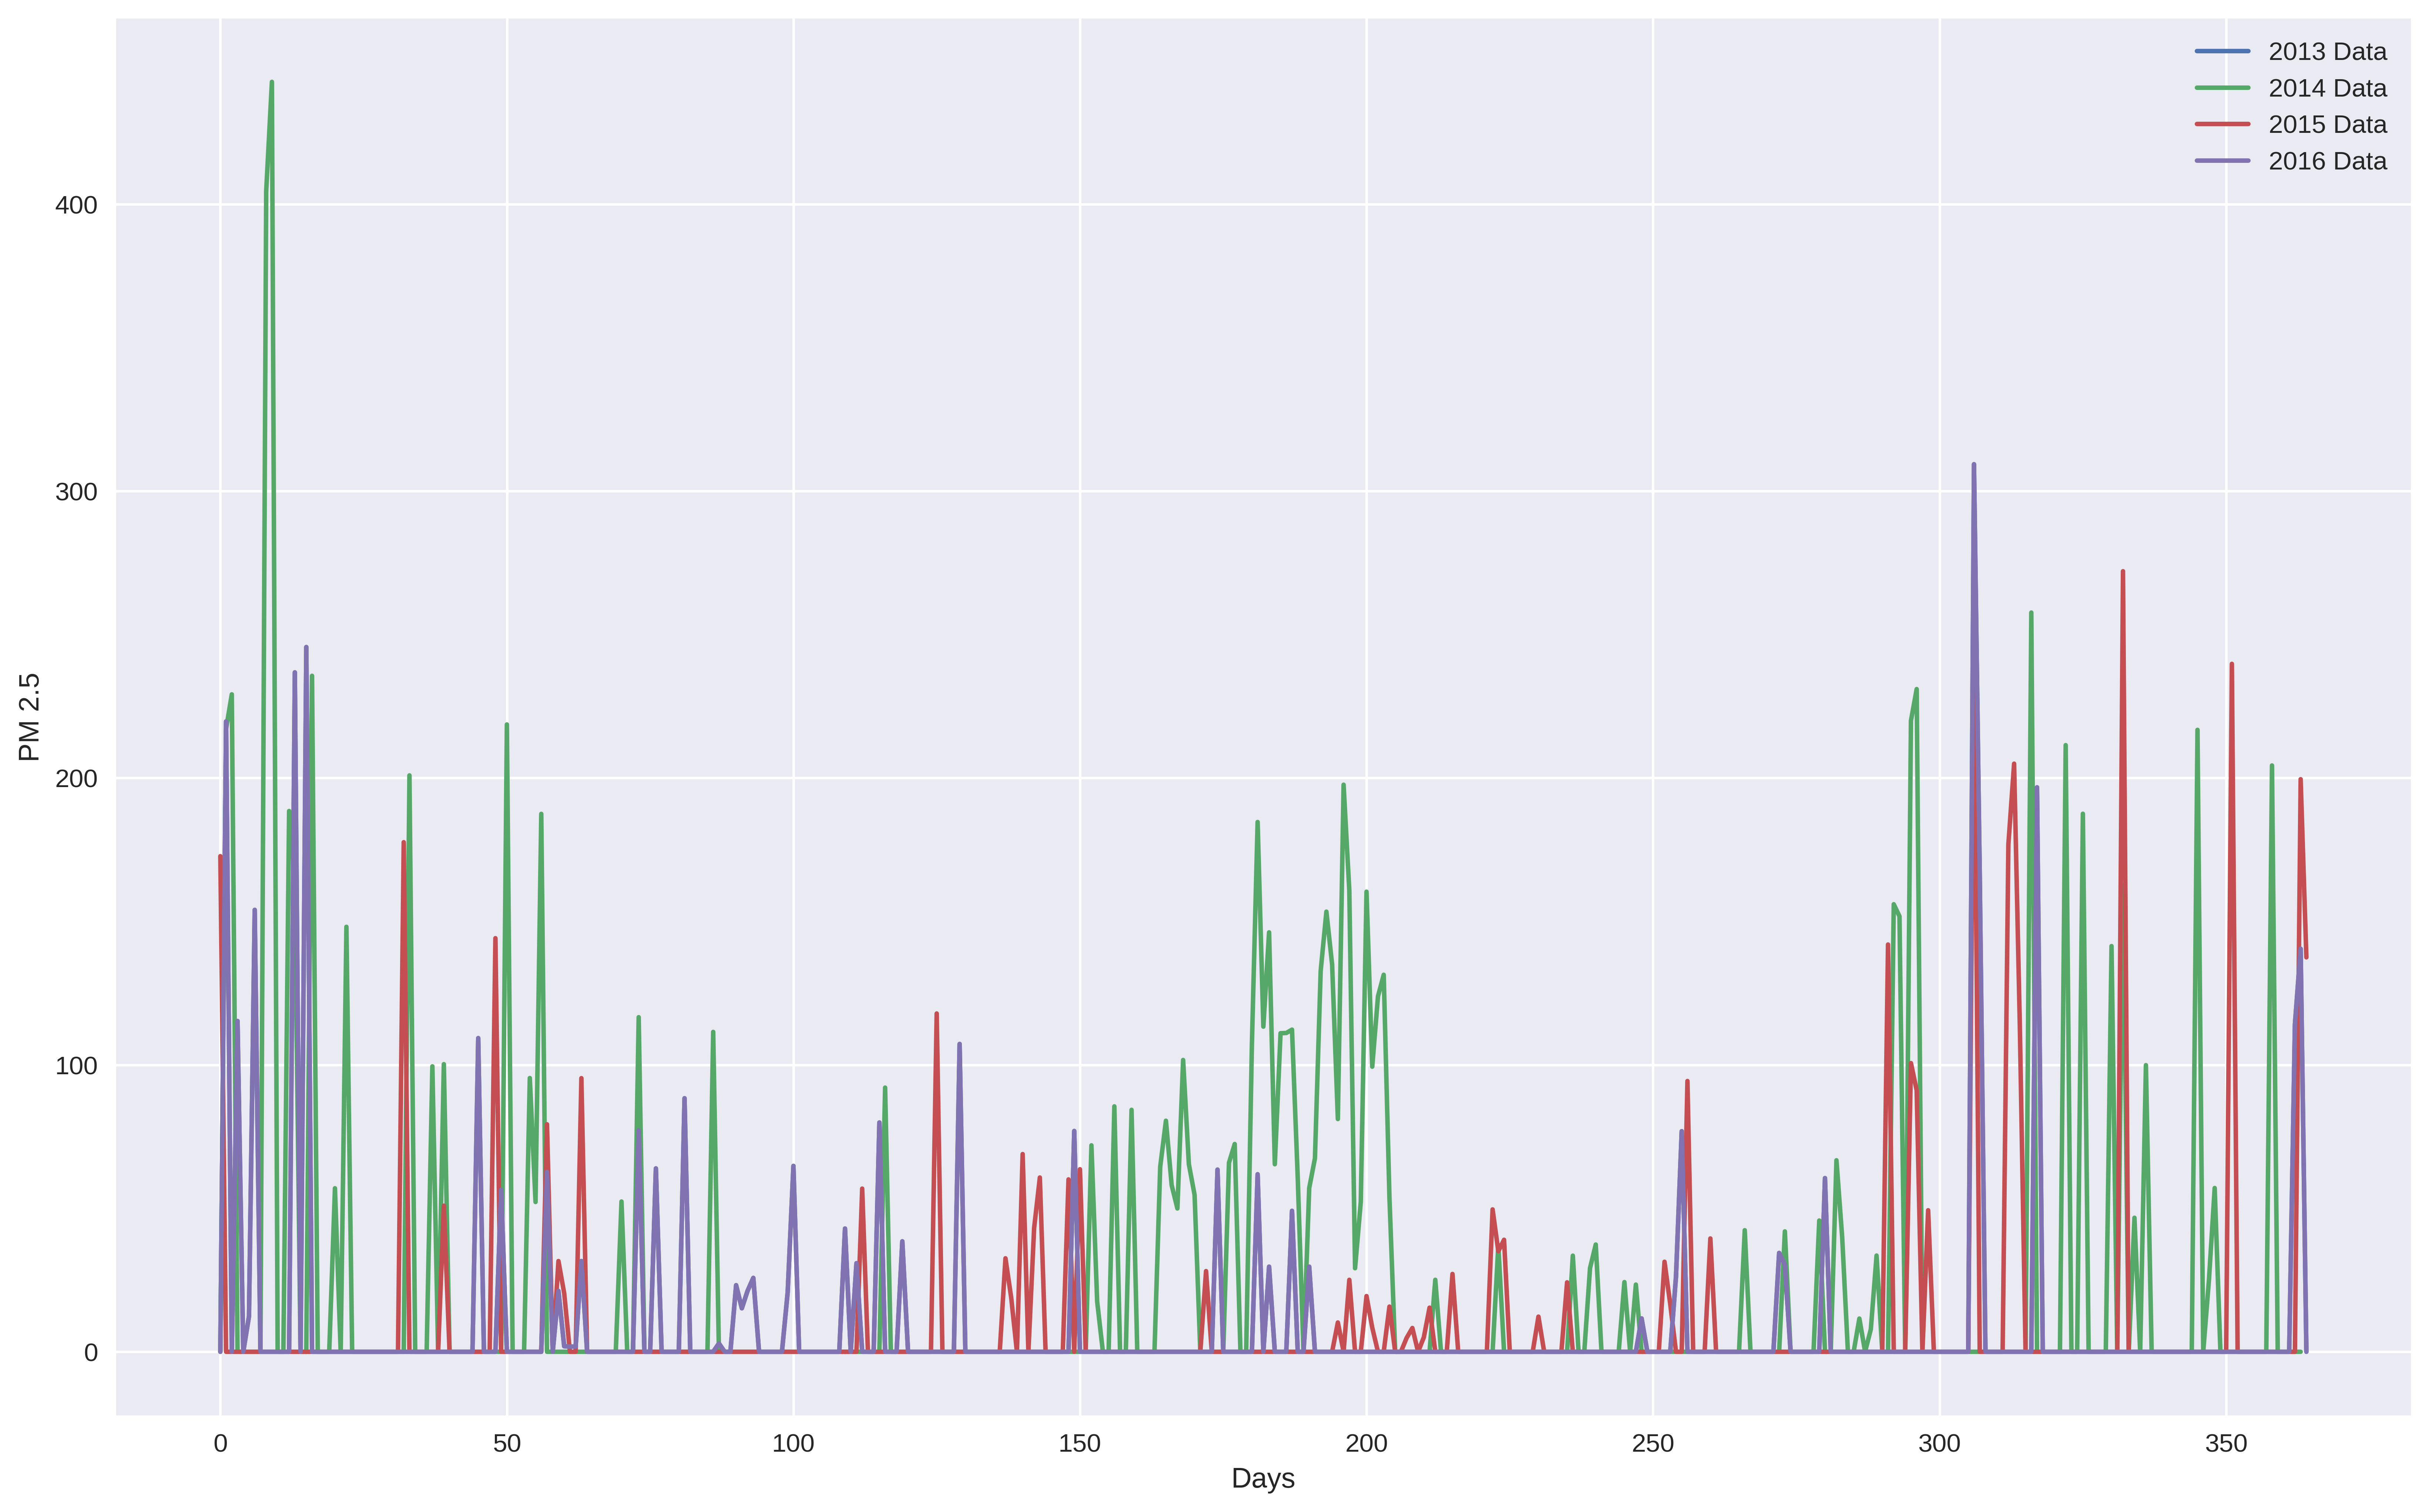

In [52]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(16,10),dpi=500,)
plt.plot(range(len(data_year_wise[0])),data_year_wise[0],label = "2013 Data")
plt.plot(range(len(data_year_wise[1])),data_year_wise[1],label = "2014 Data")
plt.plot(range(len(data_year_wise[2])),data_year_wise[2],label = "2015 Data")
plt.plot(range(len(data_year_wise[3])),data_year_wise[3],label = "2016 Data")
plt.xlabel("Days")
plt.ylabel('PM 2.5')
plt.legend(loc='upper right')
plt.show()
fig.savefig(fname = project_path+'yearwise_pm2.5.jpg',dpi=600)